In [1042]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from datetime import datetime
from scipy.signal import argrelextrema


# Steps:

In [1103]:
#Loading Data
#Data Cleaning,imputation
#Preprocessing to get the local maxima and local minima of cycle
#Plotting the graph

In [1043]:

pdf = pd.read_csv('20-July-18-test.csv')

In [1045]:
pdf=pdf.drop('Unnamed: 4',axis=1)

# Data Imputation 


In [1046]:
#Function for data cleaning and imputation
# Remove null values  -Selecting to drop nulls
# Other options are Replace null with Mean,median,mode,lookup
def datamanipulation(pdf):
    pdf=pdf.replace('null', np.nan)
    pdf=pdf.dropna(how='any') 
    pdf['TimeinMin'] = pd.to_numeric(pdf['Hour'])*60 + pd.to_numeric(pdf['Minute'])
    pdf['Temperature'] = pd.to_numeric(pdf['Temperature'])
    return pdf

In [1047]:
pdf=datamanipulation(pdf)


# Preprocessing

In [1048]:

n=1 # number of points to be checked before and after 
# Find local peaks and acts as noise filtering algorithm
pdf['min'] = pdf.iloc[argrelextrema(pdf.Temperature.values, np.less_equal, order=n)[0]]['Temperature']
pdf['Peak Temperature in each Cycle'] = pdf.iloc[argrelextrema(pdf.Temperature.values, np.greater_equal, order=n)[0]]['Temperature']


In [1049]:
def getregularInterval(df):
    lst=[]
    for i in range(1,31):
        lst.append((df.TimeinMin[(20*i)+1]))
    return lst

In [1050]:
RegularInterval= getregularInterval(pdf)

In [1051]:

df2 = pd.DataFrame(RegularInterval, columns=['TimeinMin'])

In [1052]:
df2['RegularInt']=df2['TimeinMin']

In [1053]:
pdf=pd.merge(pdf, df2,how='left', on='TimeinMin')

In [1054]:
pdf['Temperature at Regular Interval'] = np.where(pdf.RegularInt.isnull(), pdf.RegularInt, pdf.Temperature)


# Finding Number of Cycles 

In [1055]:
NumberofCycles = pdf['Peak Temperature in each Cycle'].count()
NumberofCyclegt160 =pdf[pdf['Peak Temperature in each Cycle'] >= 160]['Peak Temperature in each Cycle'].count()
PercofCyclegt160=round((NumberofCyclegt160/NumberofCycles)*100,2)

In [1092]:
pdf['Date'] = pd.to_datetime(pdf['Date']).apply(lambda x: x.date())
v_date=pdf['Date'][0]

# Plotting Graph

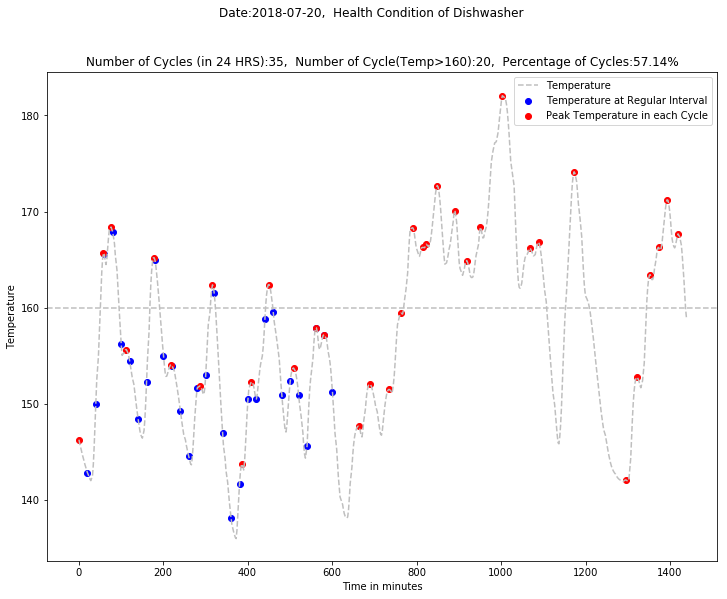

In [1102]:
# Plot results
plt.scatter(pdf.TimeinMin, pdf['Temperature at Regular Interval'], c='b')
plt.scatter(pdf.TimeinMin, pdf['Peak Temperature in each Cycle'], c='r')
plt.plot(pdf.TimeinMin, pdf['Temperature'],color='0.75',linestyle="--")
plt.axhline(y=160, color='0.75', linestyle='--')
plt.rcParams["figure.figsize"] =(12,9)
plt.xlabel('Time in minutes')
plt.ylabel('Temperature')
plt.legend()

plt.suptitle('Date:' + str(v_date) + ',  ' +'Health Condition of Dishwasher')
plt.title('Number of Cycles (in 24 HRS):'+ str(NumberofCycles) + ',  ' +  'Number of Cycle(Temp>160):' + str(NumberofCyclegt160)\
            + ',  ' + 'Percentage of Cycles:'+ str(PercofCyclegt160)+'%')
plt.show()

